In [7]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [24]:
df_translations = pd.read_csv("../data/translations/experiment_results.csv")
translation_norm = "translation_norm"

metrics = ['Dice 3D [%]', 'IoU 3D [%]', 'Chamfer distance 3D [mm]', 'Avg IoU 2D [%]', 'Avg Dice 2D [%]']
df_translations

,Unnamed: 0,translation,translation_norm,scale,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm],Avg IoU 2D [%],Avg Dice 2D [%]
0,0,"[-50, -50]",70.710678,1,NaN,31.870670,18.956044,5.037490,0.666667,0.666667
1,1,"[-50, -40]",64.031242,1,NaN,30.044843,17.678100,4.417336,0.666667,0.666667
2,2,"[-50, -30]",58.309519,1,NaN,29.052632,16.995074,4.283789,0.666667,0.666667
3,3,"[-50, -20]",53.851648,1,NaN,30.327869,17.874396,3.998674,0.666667,0.666667
4,4,"[-50, -10]",50.990195,1,NaN,35.483871,21.568627,3.746943,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...
95,95,"[40, 0]",40.000000,1,NaN,30.738523,18.160377,3.840124,0.777778,0.833333
96,96,"[40, 10]",41.231056,1,NaN,29.317269,17.176471,4.004577,0.666667,0.666667
97,97,"[40, 20]",44.721360,1,NaN,31.836735,18.932039,4.241339,0.666667,0.666667
98,98,"[40, 30]",50.000000,1,NaN,30.277186,17.839196,4.446028,0.666667,0.666667


In [25]:
df_translations.describe()

,Unnamed: 0,translation_norm,scale,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm],Avg IoU 2D [%],Avg Dice 2D [%]
count,100.000000,100.000000,100.0,0.0,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,38.530576,1.0,NaN,38.623779,24.399269,3.375912,0.687778,0.696667
std,29.011492,14.750268,0.0,NaN,9.348074,8.149032,0.918118,0.051647,0.068575
min,0.000000,0.000000,1.0,NaN,26.781857,15.461347,0.911168,0.666667,0.666667
25%,24.750000,29.571068,1.0,NaN,31.955334,19.015986,2.967413,0.666667,0.666667
50%,49.500000,41.231056,1.0,NaN,36.417822,22.262709,3.555738,0.666667,0.666667
75%,74.250000,50.000000,1.0,NaN,40.912754,25.717744,4.000150,0.666667,0.666667
max,99.000000,70.710678,1.0,NaN,76.635514,62.121212,5.470290,1.000000,1.000000


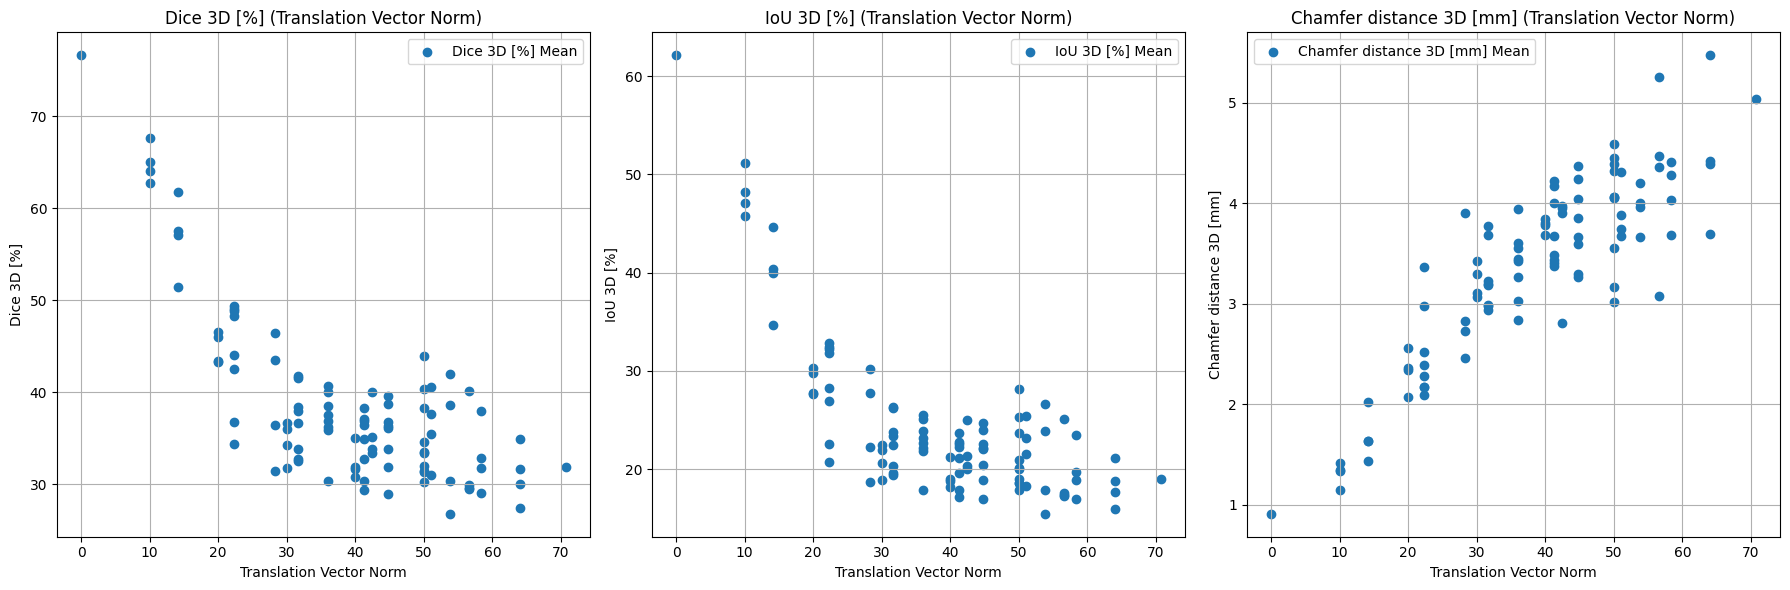

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics[:3]):
    mean_values = df_translations[metric]
    var_values = df_translations[metric]
    axes[i].scatter(df_translations[translation_norm], mean_values, label=f'{metric} Mean', marker='o')
    axes[i].set_title(f'{metric} (Translation Vector Norm)')
    axes[i].set_xlabel('Translation Vector Norm')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.savefig('figures/metric_translation.png')
plt.show()


In [ ]:
df_scaling = pd.read_csv("../data/scaling/experiment_results.csv")
scale = "scale"

metrics = ['Dice 3D [%]', 'IoU 3D [%]', 'Chamfer distance 3D [mm]', 'Avg IoU 2D [%]', 'Avg Dice 2D [%]']
df_scaling

In [26]:
df_scaling.describe()

,Unnamed: 0,translation_norm,scale,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm],Avg IoU 2D [%],Avg Dice 2D [%]
count,150.000000,150.0,150.000000,0.0,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,0.0,1.245000,NaN,54.556631,38.391344,2.256808,0.668889,0.668889
std,43.445368,0.0,0.434454,NaN,11.433175,11.354264,0.779494,0.027217,0.027217
min,0.000000,0.0,0.500000,NaN,30.516432,18.005540,0.790982,0.666667,0.666667
25%,37.250000,0.0,0.872500,NaN,51.293913,34.493486,1.829987,0.666667,0.666667
50%,74.500000,0.0,1.245000,NaN,52.728985,35.804048,2.277560,0.666667,0.666667
75%,111.750000,0.0,1.617500,NaN,57.510822,40.361945,2.660657,0.666667,0.666667
max,149.000000,0.0,1.990000,NaN,80.788177,67.768595,4.141588,1.000000,1.000000


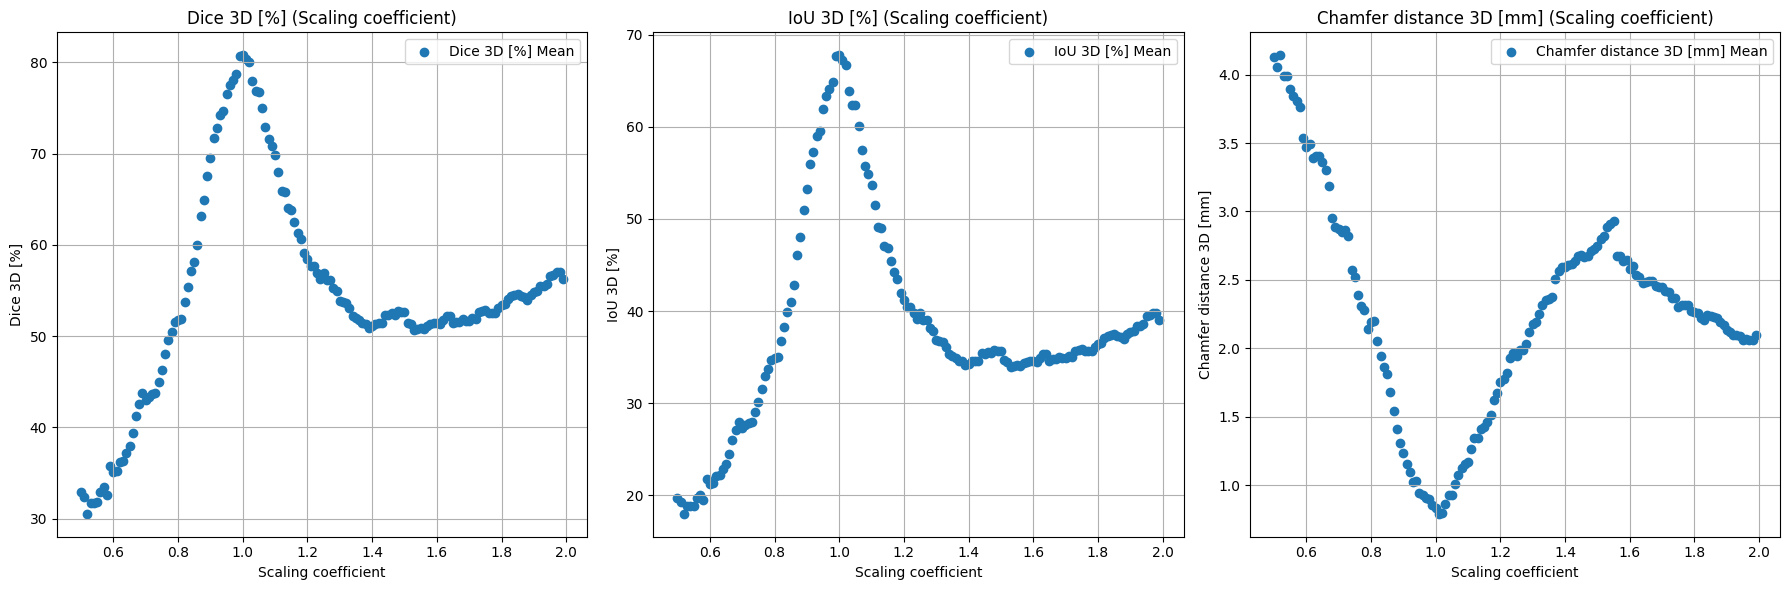

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics[:3]):
    mean_values = df_scaling[metric]
    var_values = df_scaling[metric]
    axes[i].scatter(df_scaling[scale], mean_values, label=f'{metric} Mean', marker='o')
    axes[i].set_title(f'{metric} (Scaling coefficient)')
    axes[i].set_xlabel('Scaling coefficient')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.savefig('figures/metric_scaling.png')
plt.show()